# Texas killings by county


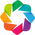

In [1]:
# Pandas import
import pandas as pd

# Bokeh import, only dataset
from bokeh.sampledata.us_counties import data as counties

# Holoview
import holoviews as hv
hv.extension('bokeh')

data = pd.read_csv('../data/fatalencounters.csv')
texas = data[data['Location of death (state)'] == 'TX']
texas_counties = texas['Location of death (county)'].value_counts()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]

# The Data that we calculated using Pandas
county_values = [texas_counties[county] if county in texas_counties else 0  for county in county_names]


county_polys = {name: hv.Polygons((xs, ys), level=rate, vdims=['Killings'])
                for name, xs, ys, rate in zip(county_names, county_xs, county_ys, county_values)}

choropleth = hv.NdOverlay(county_polys, kdims=['County'])

In [2]:
plot_opts = dict(logz=True, tools=['hover'], xaxis=None, yaxis=None,
                 show_grid=False, show_frame=False, width=500, height=500)
style = dict(line_color='white')

c = choropleth({'Polygons': {'style': style, 'plot': plot_opts}})
c

:NdOverlay   [County]
   :Polygons   [x,y]   (Killings)